In [12]:
import numpy as np
import sys
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import interferometer as itf
sys.path.append('../') # Add parent directory to the system path
from boson_sampling_probabilities import output_probability
from direct_decomposition import direct_decomposition, random_unitary
from simulation import run_interferom_simulation

from numeric_truncated_unitaries import numeric_truncated_unitary
from direct_decomposition import round_complex_matrix, compile_unitary, knit_qiskit_circuits

In [13]:
I = itf.Interferometer()
BS1 = itf.Beamsplitter(1, 2, theta=np.pi/4, phi=0)
BS2 = itf.Beamsplitter(2, 3, theta=np.pi/3, phi=0)
I.add_BS(BS1)
I.add_BS(BS2)

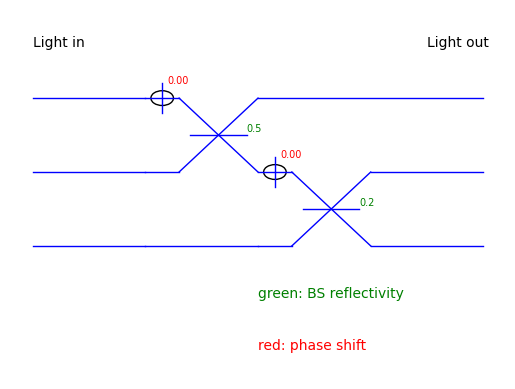

In [3]:
I.draw()

In [14]:
U=I.calculate_transformation()
print(U)

[[ 0.70710678+0.j -0.70710678+0.j  0.        +0.j]
 [ 0.35355339+0.j  0.35355339+0.j -0.8660254 +0.j]
 [ 0.61237244+0.j  0.61237244+0.j  0.5       +0.j]]


In [15]:
m = U.shape[0]
circuits = []
for BS in I.BS_list:
    U_BS = numeric_truncated_unitary(BS.theta, BS.phi, 1)
    round_complex_matrix(U_BS) # Is this step necessary?
    circuits.append(compile_unitary(U_BS)) # Compile individual unitaries into quantum circuits

In [16]:
big_circuit = knit_qiskit_circuits(3, BS_list=I.BS_list, circuits=circuits)

In [66]:
print(big_circuit)

        ┌───────────────────┐            ┌──────────────────┐        »
q_0: ───┤ U3(π/2,π/2,-3π/8) ├─────■──────┤ U3(3π/4,-π,-π/2) ├─────■──»
       ┌┴───────────────────┴─┐ ┌─┴─┐┌───┴──────────────────┴──┐┌─┴─┐»
q_1: ──┤ U3(3.1403,π/2,-7π/8) ├─┤ X ├┤ U3(1.5712,1π/4,-1.5699) ├┤ X ├»
     ┌─┴──────────────────────┴┐└───┘└─────────────────────────┘└───┘»
q_2: ┤ U3(0.0013233,-π/2,3π/8) ├─────────────────────────────────────»
     └─────────────────────────┘                                     »
«       ┌─────────────────┐      ┌────────────┐        »
«q_0: ──┤ U3(π/2,3π/8,-π) ├──────┤ U1(-1.963) ├────────»
«     ┌─┴─────────────────┴─┐┌───┴────────────┴──┐     »
«q_1: ┤ U3(1.5695,-π/8,π/2) ├┤ U3(π/2,-π/2,7π/8) ├──■──»
«     └─────────────────────┘└───────────────────┘┌─┴─┐»
«q_2: ────────────────────────────────────────────┤ X ├»
«                                                 └───┘»
«                                                                              
«q_0: ──────────────────

In [56]:
print(circuits[1])

         ┌───────────────────┐               ┌──────────────────┐         »
q_0: ────┤ U3(π/2,-π/2,5π/8) ├───────■───────┤ U3(2π/3,-π,-π/2) ├──────■──»
     ┌───┴───────────────────┴────┐┌─┴─┐┌────┴──────────────────┴───┐┌─┴─┐»
q_1: ┤ U3(0.0013233,-π/2,-0.6545) ├┤ X ├┤ U3(1.5715,0.5236,-1.5697) ├┤ X ├»
     └────────────────────────────┘└───┘└───────────────────────────┘└───┘»
«         ┌─────────────────┐    ┌─────────────┐
«q_0: ────┤ U3(π/2,-5π/8,0) ├────┤ U1(-5.2354) ├
«     ┌───┴─────────────────┴───┐└─────────────┘
«q_1: ┤ U3(1.5721,-2.4871,-π/2) ├───────────────
«     └─────────────────────────┘               


In [20]:
counts = run_interferom_simulation(U, [0,0,1], 1e7)

In [21]:
print(counts)

{'010': 0.1251025, '100': 0.3749173, '001': 0.4999802}


In [22]:
output_states = [[1,0,0],[0,1,0],[0,0,1]]
for state in output_states:
    print(f"P {state} = {output_probability([1,0,0], state, U)}")

P [1, 0, 0] = 0.5000000000000001
P [0, 1, 0] = 0.12500000000000003
P [0, 0, 1] = 0.37499999999999994
